
### This script contains the following points;
### 1. Importing Data and Libraries
### 2. Visualisations - Merged and Grouped "Products - Orders" Data Frame
    2.1 Bar Charts
    2.2 Histograms and Scatterplot
    2.3 Sample Data and Line Chart
### 3. Customers Data (New Data Frame) 
    3.1 Data Wrangling 
    3.2 Data Quality & Consistency Checks
  
### 4. Merging Data Frames (Product-Orders with Customers)

### 5. Exporting Data


### 1. Importing Data and Libraries

In [1]:
# importing data and libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\senja\OneDrive\Documents\5. Learning\4. Data Analytics Immersion\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\senja\\OneDrive\\Documents\\5. Learning\\4. Data Analytics Immersion\\Instacart Basket Analysis'

In [4]:
#import grouped_merged pkl file

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'grouped_merged.pkl'))

In [5]:
#import new customer file

df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [6]:
## check merged data

ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,Busiest day,Busiest days,busiest_period_of_day_range,max_order,loyalty_flag,mean_price,Spender_flag,median_order_frequency,Frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average Orders,5,New customer,7.930208,Low spender,6.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most Orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average Orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


### 2. Visualisations - Merged and Grouped "Products - Orders" Data Frame

### 2.1 Bar Charts

<AxesSubplot:>

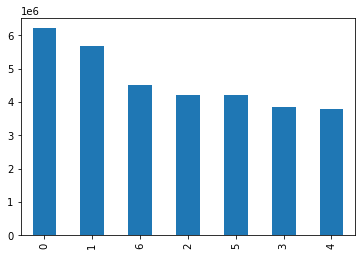

In [7]:
# create the bar chart for orders by weekdays from largest to smallest

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

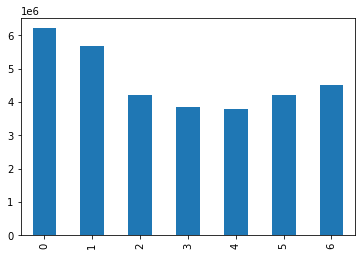

In [8]:
# create the bar chart for orders from Sun to Sat

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

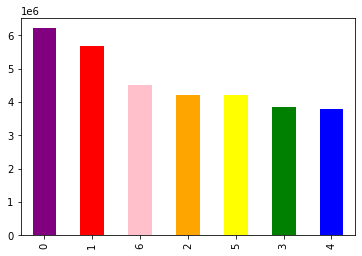

In [9]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink', 'orange','yellow', 'green','blue'])

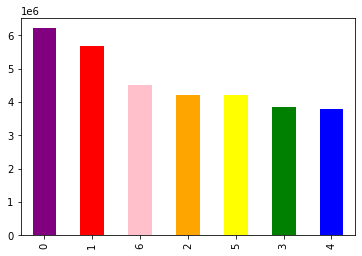

In [10]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

### 2.3 Histograms and Scatterplot

<AxesSubplot:ylabel='Frequency'>

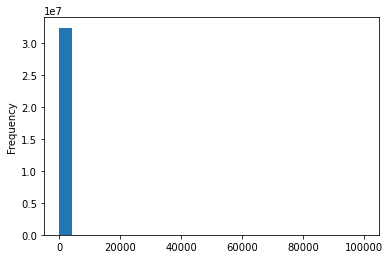

In [12]:
# create a histogram for prices

ords_prods_merge['prices'].plot.hist(bins = 25)

In [13]:
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
ords_prods_merge['prices'].mean()

11.981143922956724

In [15]:
ords_prods_merge['prices'].median()

7.4

In [16]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

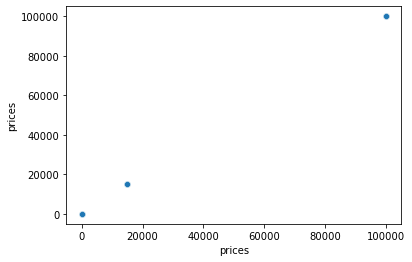

In [17]:
# create a price scatterplot to check outliners

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
# check prices above 100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,Busiest day,Busiest days,busiest_period_of_day_range,max_order,loyalty_flag,mean_price,Spender_flag,median_order_frequency,Frequency_flag
13128379,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13128380,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13128381,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average Orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13128382,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average Orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13128383,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average Orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815122,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21815123,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Average Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21815124,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest days,Most Orders,15,Regular customer,451.153540,High spender,4.0,Frequent customer
21815125,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest days,Average Orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


In [19]:
# ad hoc data cleaning - mark prices above 100 as of missing 

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [20]:
# check the max

ords_prods_merge['prices'].max()

25.0

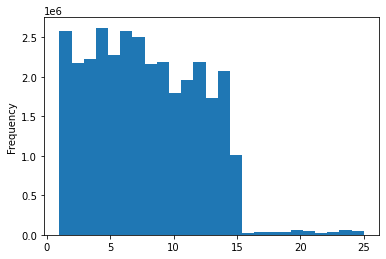

In [21]:
# create a histogram 

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

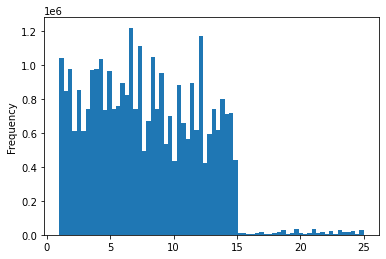

In [22]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [23]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_prices.png'))

### 2.3 Sample Data and Line Chart

In [24]:
np.random.seed(4)

In [25]:
#create a list holding true/false values to test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
dev

array([False,  True, False, ..., False,  True,  True])

In [27]:
# store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [28]:
# store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [29]:
len(ords_prods_merge)

32434212

In [30]:
len(big) + len(small)

32434212

In [31]:
# create the subset from small data frame with only weekday and price data

df_2 = small[['orders_day_of_week','prices']]

In [32]:
df_2

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8
...,...,...
32434188,1,13.5
32434191,4,13.5
32434199,6,13.5
32434204,2,13.5


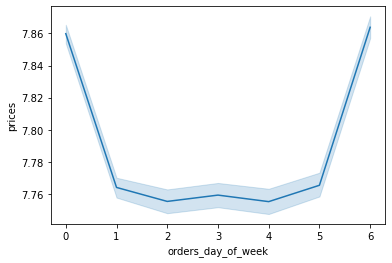

In [33]:
# create line chart for df_2 data

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

### 3. Customers Data (New Data Frame)

In [34]:
# check customer data

df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [35]:
df_customers.shape

(206209, 10)

### 3.1 Data Wranging 

In [36]:
# renaming column "First Name"

df_customers.rename(columns = {'First Name' : 'first_name'}, inplace = True)

In [37]:
# renaming column "Surnam"

df_customers.rename(columns = {'Surnam' : 'last_name'}, inplace = True)

In [38]:
# renaming column "Gender"

df_customers.rename(columns = {'Gender' : 'sex'}, inplace = True)

In [39]:
# renaming column "STATE"

df_customers.rename(columns = {'STATE' : 'us_state'}, inplace = True)

In [40]:
# renaming column "Age"

df_customers.rename(columns = {'Age' : 'age'}, inplace = True)

In [41]:
# renaming column "Age"

df_customers.rename(columns = {'n_dependants' : 'no_dependants'}, inplace = True)

In [42]:
# renaming column "Age"

df_customers.rename(columns = {'fam_status' : 'marital_status'}, inplace = True)

In [43]:
df_customers.head()

,user_id,first_name,last_name,sex,us_state,age,date_joined,no_dependants,marital_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [44]:
df_customers['user_id'].value_counts(dropna = False)

2049      1
167163    1
187633    1
181490    1
183539    1
         ..
150044    1
147997    1
154142    1
152095    1
2047      1
Name: user_id, Length: 206209, dtype: int64

In [45]:
df_customers['income'].value_counts(dropna = False)

95891     10
57192     10
95710     10
94809      9
97532      9
          ..
139481     1
152861     1
464181     1
228664     1
28658      1
Name: income, Length: 108012, dtype: int64

### 3.2 Data Quality & Consistency Checks

In [46]:
df_customers.describe()

,user_id,age,no_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [47]:
# check the mix data

for col in df_customers.columns.tolist():
  weird = (df_customers[[col]].applymap(type) != df_customers[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_customers[weird]) > 0:
    print (col)

first_name


In [48]:
# convert first_name column numberic data to string

df_customers['first_name'] = df_customers['first_name'].astype('str')

In [49]:
# check the missing values 

df_customers.isnull().sum()

user_id           0
first_name        0
last_name         0
sex               0
us_state          0
age               0
date_joined       0
no_dependants     0
marital_status    0
income            0
dtype: int64

In [50]:
# check the duplicates

df_dups = df_customers[df_customers.duplicated()]

In [51]:
df_dups

,user_id,first_name,last_name,sex,us_state,age,date_joined,no_dependants,marital_status,income


### 4. Merging Data Frames (Product-Orders with Customers)

In [52]:
 # check the column names for product-orders data frame
    
ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'Busiest day', 'Busiest days',
       'busiest_period_of_day_range', 'max_order', 'loyalty_flag',
       'mean_price', 'Spender_flag', 'median_order_frequency',
       'Frequency_flag'],
      dtype='object')

In [53]:
# check the key column user_id data type

ords_prods_merge['user_id'].value_counts

<bound method IndexOpsMixin.value_counts of 0              138
1              138
2              709
3              764
4              764
             ...  
32434207    200215
32434208    200377
32434209    200873
32434210    200873
32434211    205926
Name: user_id, Length: 32434212, dtype: int64>

In [54]:
df_customers['user_id'].value_counts

<bound method IndexOpsMixin.value_counts of 0          26711
1          33890
2          65803
3         125935
4         130797
           ...  
206204    168073
206205     49635
206206    135902
206207     81095
206208     80148
Name: user_id, Length: 206209, dtype: int64>

In [55]:
ords_prods_merge.shape

(32434212, 24)

In [56]:
df_customers.shape

(206209, 10)

In [57]:
# create the new data frame "cop" including customer, orders, products data

df_merged_cop = ords_prods_merge.merge(df_customers, on = ['user_id'])

In [58]:
df_merged_cop

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Frequency_flag,first_name,last_name,sex,us_state,age,date_joined,no_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434207,49235,Organic Half & Half,53,16,1.8,2542346,80734,3,3,8,...,Non-frequent customer,Frank,Bowers,Male,Alabama,45,9/28/2019,1,married,41072
32434208,49520,Orange Sparkling Water,115,7,7.5,1363278,74506,1,1,14,...,Regular customer,Joe,Coffey,Male,Vermont,44,4/16/2018,3,married,97209
32434209,49520,Orange Sparkling Water,115,7,7.5,2008002,74506,2,0,15,...,Regular customer,Joe,Coffey,Male,Vermont,44,4/16/2018,3,married,97209
32434210,49520,Orange Sparkling Water,115,7,7.5,1595973,74506,3,1,17,...,Regular customer,Joe,Coffey,Male,Vermont,44,4/16/2018,3,married,97209


In [59]:
df_merged_cop.shape

(32434212, 33)

### 5. Exporting Data

In [60]:
df_merged_cop.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_cop.pkl'))